<a href="https://colab.research.google.com/github/Sashmikha/Fetal-Health-Classifier/blob/main/Python_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fetal Health Classification

In this project, machine learning is used for the prediction of fetal health to prevent child and maternal mortality.


---


**Cardiotocograms (CTGs)** are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.


This dataset contains **2126 records** of features extracted from Cardiotocogram exams, which were then classified by expert obstetrician into 3 classes:

1. **Normal**
2. **Suspect**
3. **Pathological** 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Github/

[Errno 2] No such file or directory: '/content/drive/MyDrive/Github/'
/content


## Loading data

In [ ]:
# Necessary libraries
import numpy as np
import pandas as pd
import itertools

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn import datasets
%matplotlib inline

# Scaling the data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Splitting the data
from sklearn.model_selection import train_test_split

# Algorithms
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Stacking
from sklearn.ensemble import StackingClassifier

# For Hyper-parameter Tuning the model
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

# For checking Model Performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error





In [ ]:
# Step 1: Reading data from csv file

# Load csv file
fetal = pd.read_csv('fetal_health.csv')
fetal

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


## Data analysis

In [ ]:
# Analysing statistical insights

# print the decsription of data and transpose it
fetal.describe().T


,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [ ]:
# Analysing the target column
print(fetal['fetal_health'].unique())

print(fetal["fetal_health"].value_counts())


[2. 1. 3.]
1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64


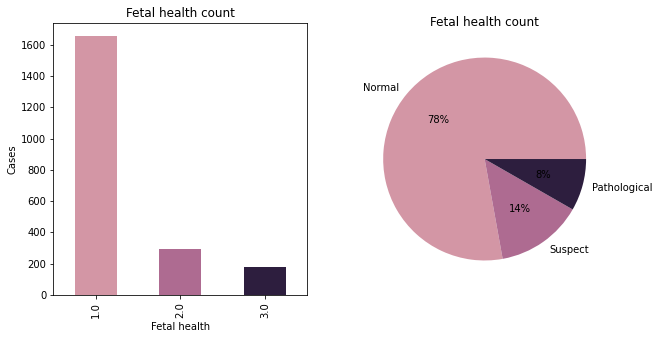

In [ ]:
# Data visualizations for frequency of fetal health 
# 'fetal_health' Tagged as 1 (Normal), 2 (Suspect) and 3 (Pathological)

colors = ["#d396a5", "#ae6b91", "#2d1e3e"]

# Bar chart
plt.subplot(121)
vis_fetal_health = fetal.fetal_health.value_counts().plot(figsize=(10, 5), kind="bar", color=colors)
plt.title("Fetal health count")
plt.xlabel("Fetal health")
plt.ylabel("Cases")

# Pie chart
normal = 1655
suspect = 295
pathological = 176

plt.subplot(122)
vix_pie_fetal_health = plt.pie([normal, suspect, pathological], labels=["Normal", "Suspect", "Pathological"],
                               colors=colors, autopct="%1.0f%%")
plt.title("Fetal health count")

plt.show()


# The count plot of targets indicates an imbalance in data. This is a case that tends to provide misleading classification accuracy


In [ ]:
# Step 3: Data Cleaning

#checking for null values
null = fetal.isnull().sum()
null


baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

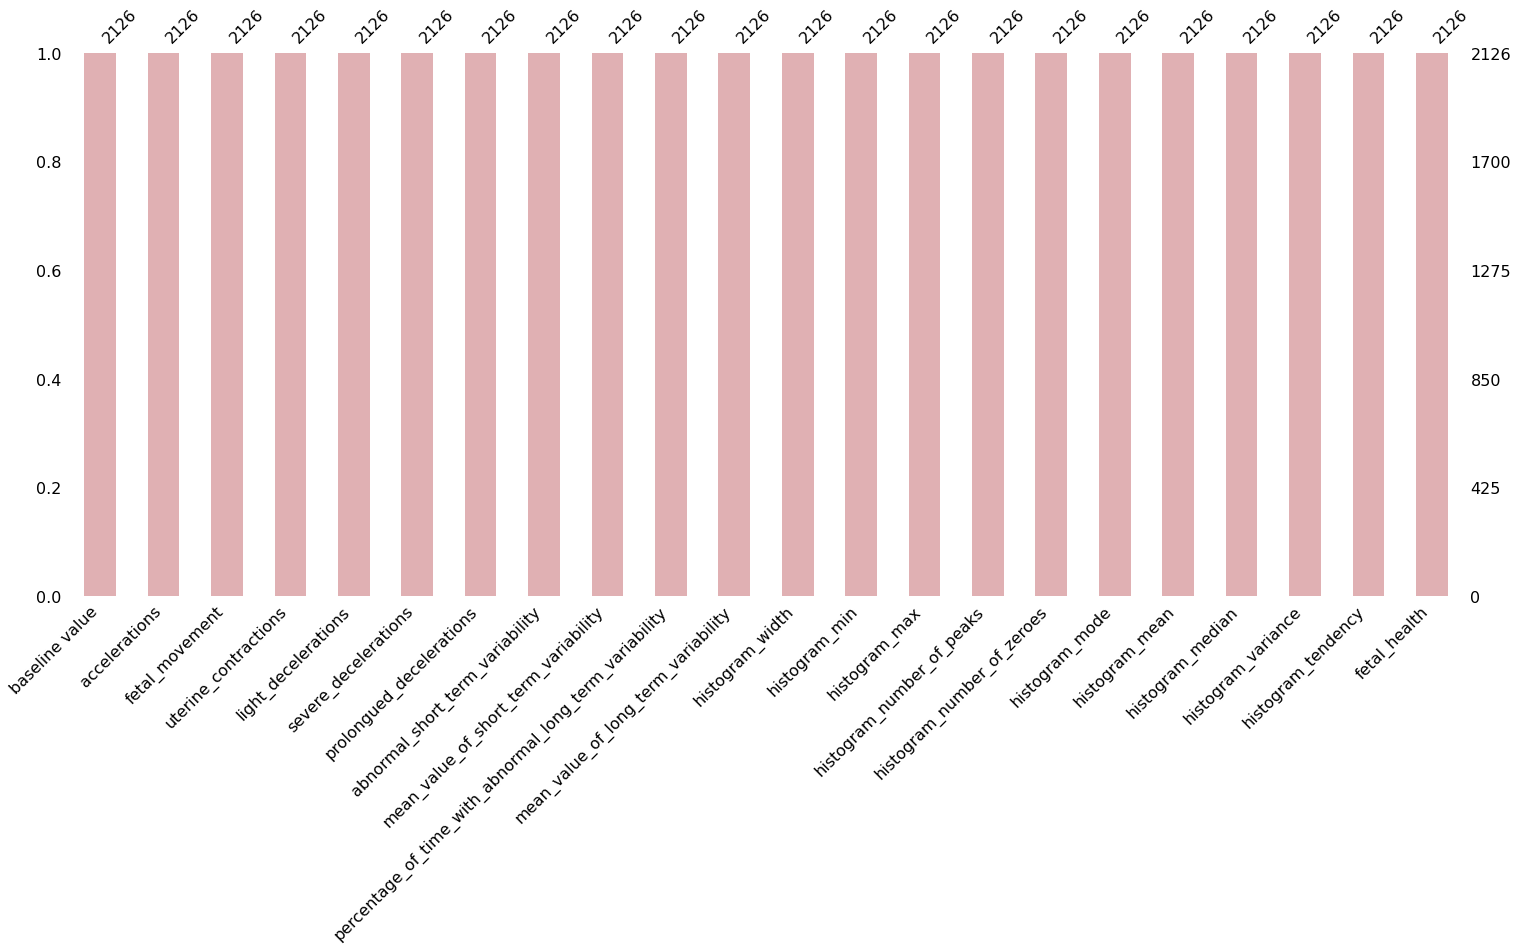

In [ ]:
# show null count analysis
null_plot = msno.bar(fetal, color="#e0b0b3")

### Correlation

The features that have high correlation with the target column (fetal_health) are:


1.   prolongued_decelerations
2.   abnormal_short_term_variability
3.   percentage_of_time_with_abnormal_long_term_variability



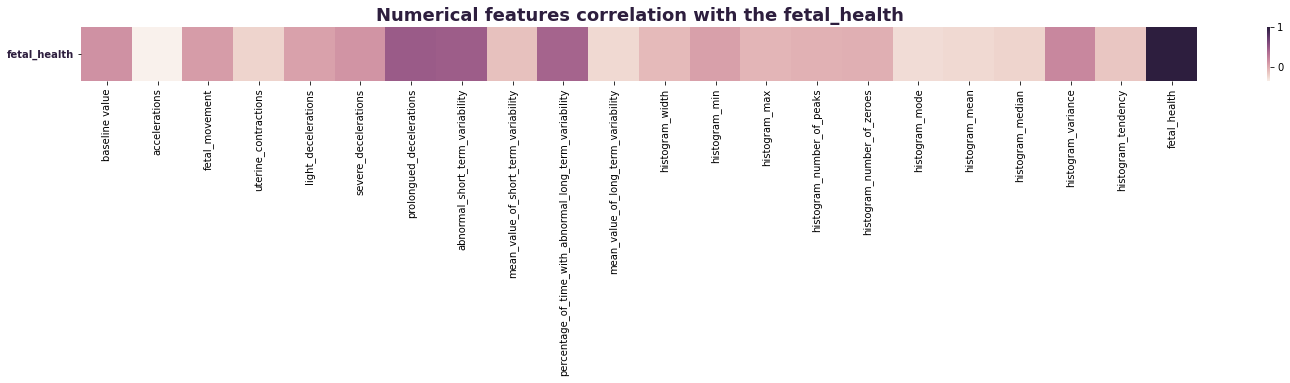

In [ ]:
# Checking correlation of numeric features with output variable “Fetal health”

numeric_data = fetal.select_dtypes(exclude="object")
numeric_corr = numeric_data.corr()

f, ax = plt.subplots(figsize=(25,1))

cmap = sns.cubehelix_palette(light=.95, as_cmap=True)

sns.heatmap(numeric_corr.sort_values(by=["fetal_health"], ascending=False).head(1), cmap=cmap)

plt.title("Numerical features correlation with the fetal_health", weight="bold", fontsize=18, color="#2d1e3e")
plt.yticks(weight="bold", color="#2d1e3e", rotation=0, label="Fetal health")

plt.show()

In [ ]:
# Checking correlation of numeric features with output variable “Fetal health” with values

num_feature = numeric_corr["fetal_health"].sort_values(ascending=False).head(20).to_frame()
fetal_health_corr_table = num_feature.style.background_gradient(cmap=cmap)

fetal_health_corr_table

,fetal_health
fetal_health,1.000000
prolongued_decelerations,0.484859
abnormal_short_term_variability,0.471191
percentage_of_time_with_abnormal_long_term_variability,0.426146
histogram_variance,0.206630
baseline value,0.148151
severe_decelerations,0.131934
fetal_movement,0.088010
histogram_min,0.063175
light_decelerations,0.058870


No features has a strong correlation with the label

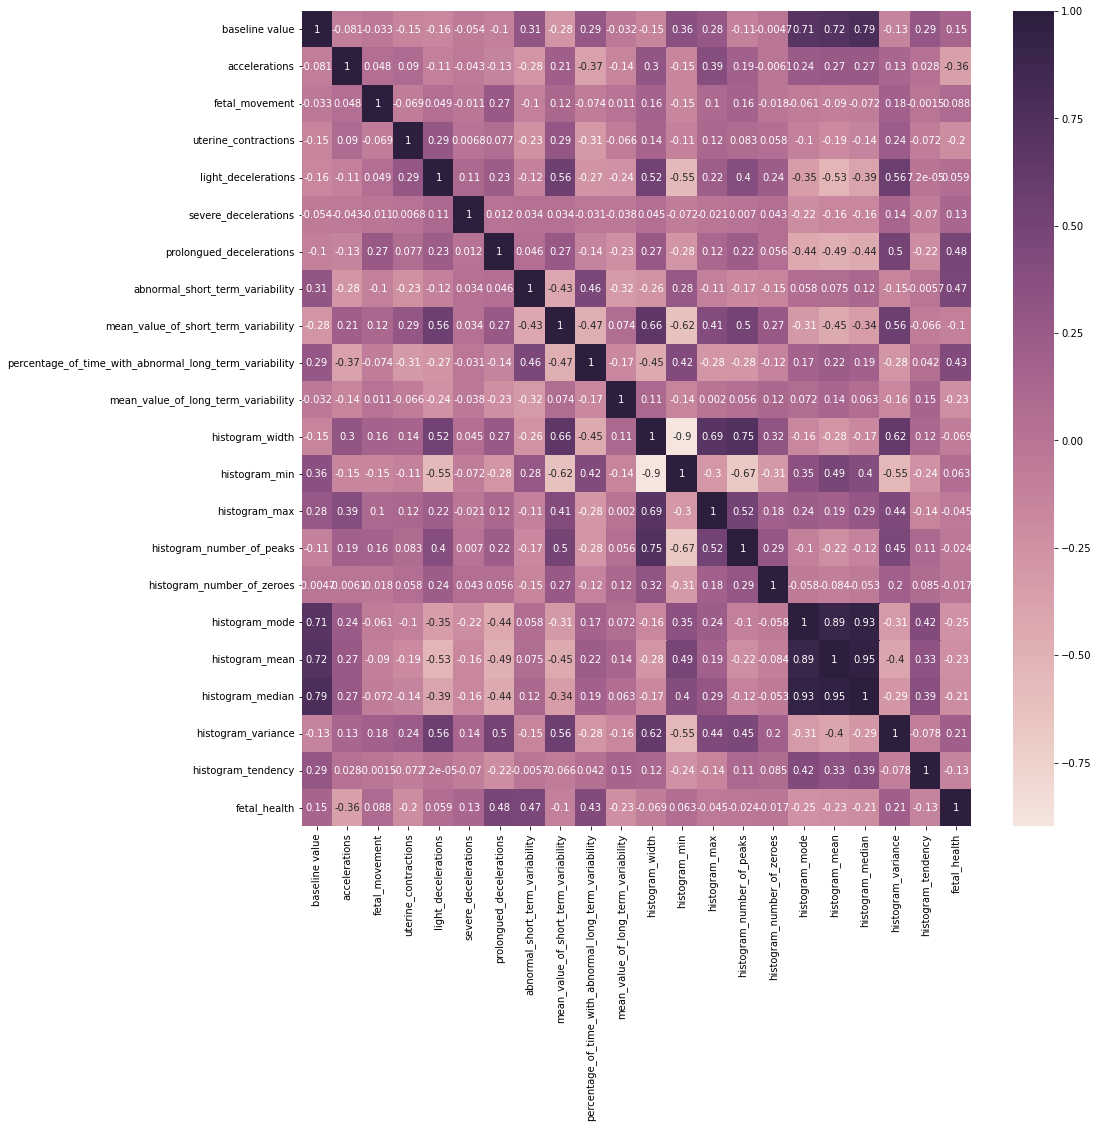

In [ ]:
# Heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(numeric_corr, annot=True, cmap=cmap, center=0)

plt.show()

In [ ]:
# Scatter matrix
# scatter_matrix = pd.plotting.scatter_matrix(fetal, figsize=(50, 50), color="#003f5c")


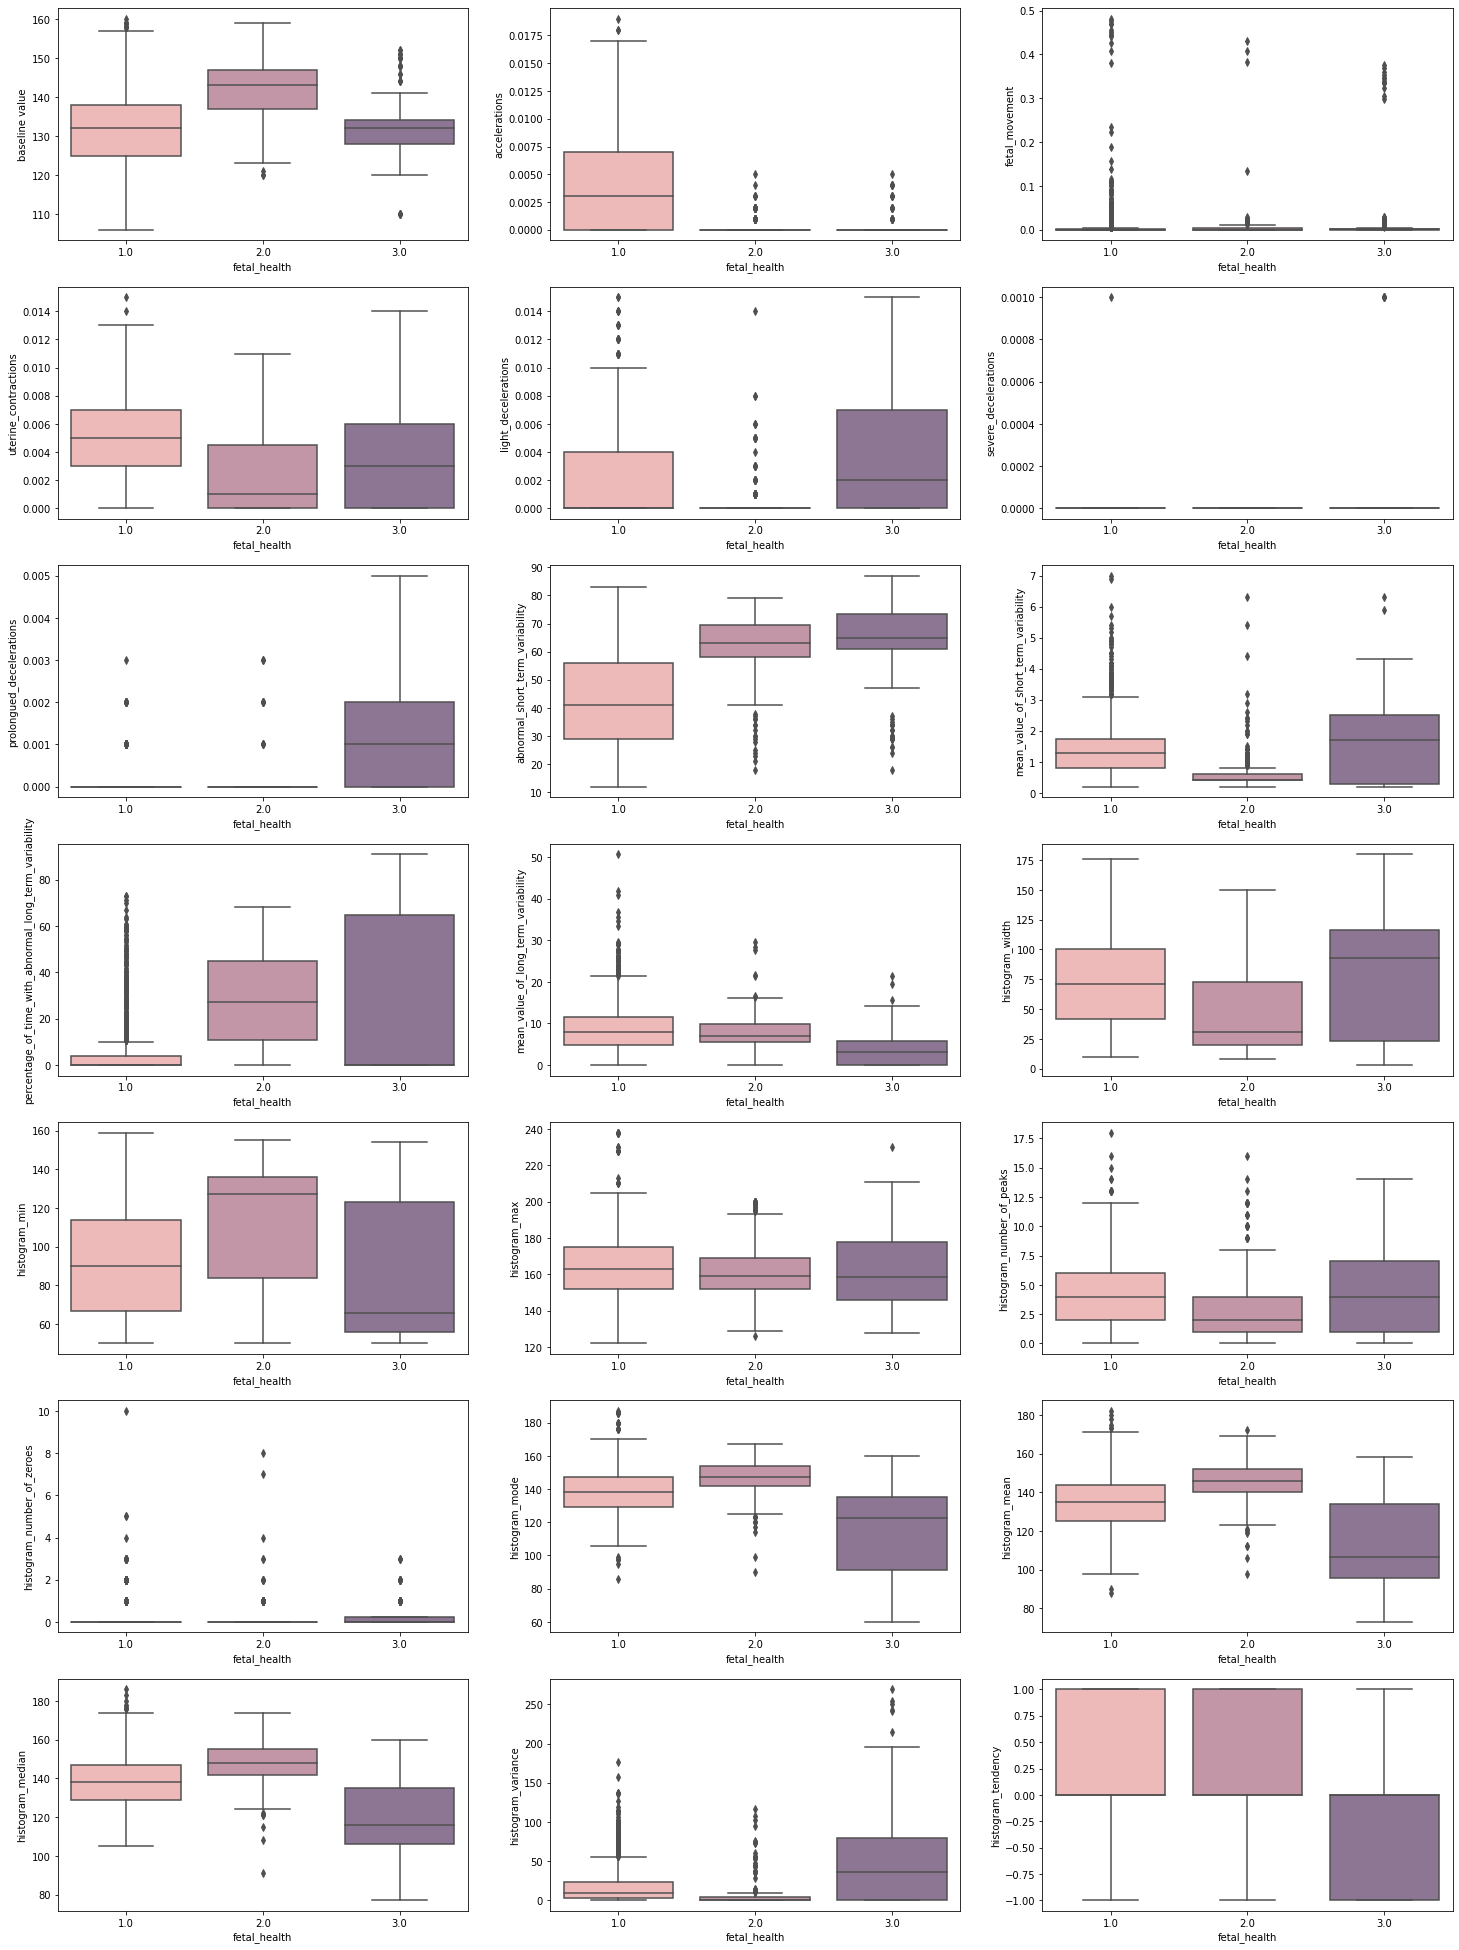

In [ ]:
shades =["#f7b2b0","#c98ea6","#8f7198","#50587f", "#003f5c"]

plt.figure(figsize=(25,35))
i=1
for feat in fetal.iloc[:,:-1].columns:
    plt.subplot(7,3,i)
    sns.boxplot(x='fetal_health',y=feat,data=fetal, palette=shades)
    i+=1

In [ ]:
# # Composite views onto multivariate datasets¶
# fetal = sns.load_dataset("fetal_health.csv")
# sns.jointplot(data=fetal, x="prolongued_decelerations", y="abnormal_short_term_variability", hue="fetal_health")

Some of these box plots look like the IQR is almost null, but this is 
because there are a few unique values in each feature, which is product of binning and encoding ordinal categorical variables.

We can see our label as a continuous variable because as the number increases in magnitude is more likely that the fetal would have a health problem, therefore we could correlate this with the features and interpret a positive pearson correlation as a feature with direct proportion to a health problem.

## Preprocessing data

### Generating polynomial features
As all correlations computed were a bit low we could create **polynomial features** to obtain relationships between them which will expand the information given to the predictive model. Considering a second degree function any of the following formulas will give us the total number of features in our dataset omitting the bias component:

Features = 2n + (n(n-1) / 2)

This process will increase more than 10 times our features, specifically to **252** which at the same time will increase complexity and inaccuracy by curse of dimensionality, but let's evaluate the performance of models with and without these extra features.

In [ ]:
X = fetal.drop(["fetal_health"], axis=1)
Y = fetal["fetal_health"]

In [ ]:
X.shape, Y.shape

((2126, 21), (2126,))

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2, include_bias=False)
df3 = pf.fit_transform(X)

In [ ]:
df3.shape

(2126, 252)

In [ ]:
# The following will keep the name of each column, 
# which is crucial when we wanted to see the importance and 
# impact of each one in the prediction:

target_feature_names = ['x'.join(['{}^{}'.format(pair[0],pair[1]) for pair in tuple if pair[1]!=0]) for tuple in [zip(X.columns,p) for p in pf.powers_]]
output_df = pd.DataFrame(df3, columns = target_feature_names)

In [ ]:
output_df.head()

,baseline value^1,accelerations^1,fetal_movement^1,uterine_contractions^1,light_decelerations^1,severe_decelerations^1,prolongued_decelerations^1,abnormal_short_term_variability^1,mean_value_of_short_term_variability^1,percentage_of_time_with_abnormal_long_term_variability^1,...,histogram_mean^2,histogram_mean^1xhistogram_median^1,histogram_mean^1xhistogram_variance^1,histogram_mean^1xhistogram_tendency^1,histogram_median^2,histogram_median^1xhistogram_variance^1,histogram_median^1xhistogram_tendency^1,histogram_variance^2,histogram_variance^1xhistogram_tendency^1,histogram_tendency^2
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,18769.0,16577.0,10001.0,137.0,14641.0,8833.0,121.0,5329.0,73.0,1.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,18496.0,19040.0,1632.0,0.0,19600.0,1680.0,0.0,144.0,0.0,0.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,18225.0,18630.0,1755.0,0.0,19044.0,1794.0,0.0,169.0,0.0,0.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,17956.0,18358.0,1742.0,134.0,18769.0,1781.0,137.0,169.0,13.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,18496.0,18768.0,1496.0,136.0,19044.0,1518.0,138.0,121.0,11.0,1.0


The last step of feature engineering is the oversampling process, because we have an unbalanced label the prediction will tend to have a bias towards the most frequent class, which clearly is not good, so SMOTE will be used **to have the same number of instances per class**.

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(output_df, Y)

In [ ]:
X_res.shape

(4965, 252)

In [ ]:
y_res_table = y_res.value_counts()
y_res_table = y_res_table.sort_index(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of Series.sort_index will be keyword-only
  


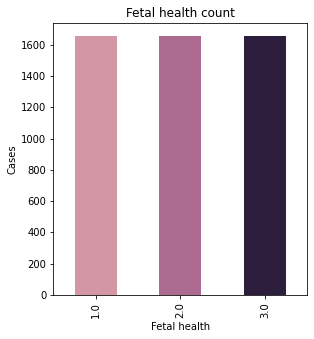

In [ ]:
# Bar chart
plt.subplot(121)
vis_y_res_fetal_health = y_res_table.plot(figsize=(10, 5), kind="bar", color=colors)
plt.title("Fetal health count")
plt.xlabel("Fetal health")
plt.ylabel("Cases")

plt.show()

### Scaling the data

Since the data obtained contains features of various dimensions and scales, scaling is required before creating a machine learning model. In this project, the techniques of features scaling used is **standardization**.

Standardization is a scaling technique that makes the data scale-free by converting the statistical distribution of the data into the below format:
1. mean - 0
2. standard deviation - 1

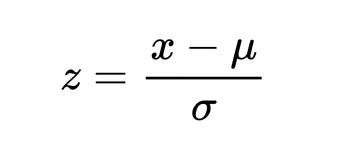

In [ ]:
# Splitting the data
# with polynomial features
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=25) 

# without polynomial features (this one just for comparing)
x_tr, x_te, y_tr, y_te = train_test_split(X, Y, test_size=0.3, random_state=25)

x_train.shape, x_test.shape, y_train.shape, y_test.shape


((3475, 252), (1490, 252), (3475,), (1490,))

In [ ]:
# Scaling the data
s_scaler = StandardScaler()

x_train = s_scaler.fit_transform(x_train)
x_test = s_scaler.fit_transform(x_test)

x_tr = s_scaler.fit_transform(x_tr)
x_te = s_scaler.fit_transform(x_te)


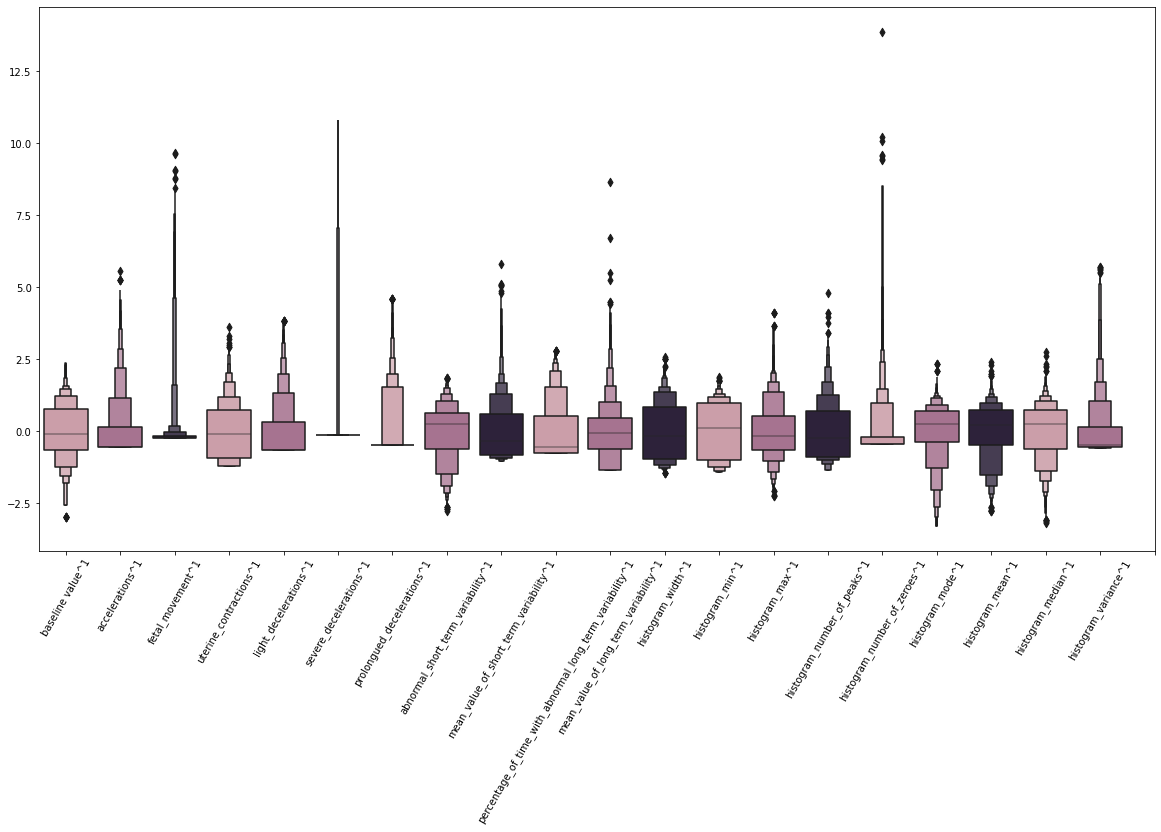

In [ ]:
#Plotting the scaled features using boxen plots
plt.figure(figsize=(20,10))
sns.boxenplot(data = x_train[:, :20],palette = colors)
plt.xticks(range(0, 21),target_feature_names[:20], rotation=60)

plt.show()
print()



## Compare performance of models with and without the polynomial features
**Cross validation**

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

In [ ]:
# Building pipelines of model for various classifiers
from sklearn.pipeline import Pipeline

pipeline_dt = Pipeline([('dt_classifier',DecisionTreeClassifier())])

pipeline_gbcl = Pipeline([('gbcl_classifier',GradientBoostingClassifier())])

pipeline_rf = Pipeline([('rf_classifier',RandomForestClassifier())])

pipeline_knn = Pipeline([('knn_classifier',KNeighborsClassifier())])

# List of all the pipelines
pipelines = [pipeline_dt, pipeline_gbcl, pipeline_rf, pipeline_knn]

# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Decision Tree', 1: 'Gradient Boost', 2:'RandomForest', 3: 'KNN'}


In [ ]:
# Performance of model with polynomial features

# Fitting the pipelines
for pipe in pipelines:
    pipe.fit(x_train, y_train)


In [ ]:
# this code use 8 mins to run... why...?

cv_results_accuracy_polynomial = []
cv_results_accuracy_polynomial_mean = []

for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, x_train, y_train, cv=12)
    cv_results_accuracy_polynomial.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

    cv_results_accuracy_polynomial_mean.append(cv_score.mean())

Decision Tree: 0.955390 
Gradient Boost: 0.972084 
RandomForest: 0.974962 
KNN: 0.948774 


In [ ]:
# Performance of model without polynomial features

# Fitting the pipelines
for pipe in pipelines:
    pipe.fit(x_tr, y_tr)

In [ ]:
cv_results_accuracy = []
cv_results_accuracy_mean = []

for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, x_tr,y_tr, cv=12)
    cv_results_accuracy.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

    cv_results_accuracy_mean.append(cv_score.mean())

Decision Tree: 0.909274 
Gradient Boost: 0.946237 
RandomForest: 0.931452 
KNN: 0.892473 


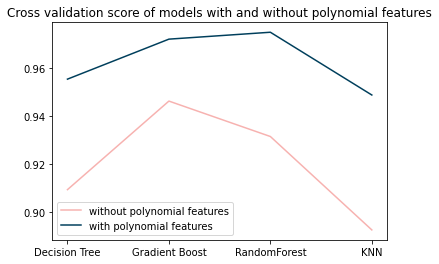

In [ ]:
models = ['Decision Tree', 'Gradient Boost', 'RandomForest', 'KNN']

plt.plot(models, cv_results_accuracy_mean, color="#f7b2b0", label="without polynomial features")
plt.plot(models, cv_results_accuracy_polynomial_mean, color="#003f5c", label="with polynomial features")

plt.title("Cross validation score of models with and without polynomial features")

plt.legend()
plt.show()

Models with polynomial features shows higher performance.

In [ ]:
cv_results_knn_accuracy = []
cv_results_knn_accuracy_mean = []

for i in range(1, 21):
  knn_temp = KNeighborsClassifier(n_neighbors=i)
  cv_knn_score = cross_val_score(knn_temp, x_tr, y_tr, cv=12)
  cv_results_knn_accuracy.append(cv_knn_score)
  cv_results_knn_accuracy_mean.append(cv_knn_score.mean())

# print(cv_results_knn_accuracy)


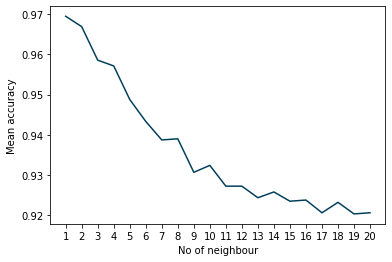

In [ ]:
plt.plot(range(1, 21), cv_results_knn_accuracy_mean, color="#003f5c")
plt.xticks(range(1, 21))
plt.xlabel("No of neighbour") # Text for X-Axis
plt.ylabel("Mean accuracy") # Text for Y-Axis
plt.show()


## Build machine learning models

In [ ]:
# # Function to get confusion matrix and the results after grid search
# def Searcher(estimator, param_grid, train_x, train_y, test_x, test_y,label=None,cv=10):
#   clf = GridSearchCV(
#                 estimator=estimator, 
#                 param_grid=param_grid, 
#                 scoring=None,
#                 n_jobs=-1, 
#                 cv=cv, #Cross-validation at 10 replicates
#                 verbose=0,
#                 return_train_score=True
#   )

#   # Fit the model
#   print('Start model fitting for', label)
#   clf.fit(X=train_x, y=train_y)

#   #Testing the model    
#   cfmatrix = confusion_matrix(y_true = test_y, y_pred = clf.predict(test_x))

#   #Defining prints for accuracy metrics of grid
#   print("**Grid search results of", label,"**")
#   print("The best parameters are:", clf.best_params_)
#   print("Best training accuracy:\t", clf.best_score_)
#   print('Classification Report:')
#   print(classification_report(y_true=test_y, y_pred=clf.predict(test_x)))

#   return clf, cfmatrix;

In [ ]:
# Function to the results after grid search
def Searcher(estimator, param_grid, train_x, train_y, test_x, test_y,label=None,cv=10):
  clf = GridSearchCV(
                estimator=estimator, 
                param_grid=param_grid, 
                scoring=None,
                n_jobs=-1, 
                cv=cv, #Cross-validation at 10 replicates
                verbose=0,
                return_train_score=True
  )

  # Fit the model
  print('Start model fitting for', label)
  clf.fit(X=train_x, y=train_y)

  #Testing the model    
  #Defining prints for accuracy metrics of grid
  print("**Grid search results of", label,"**")
  print("The best parameters are:", clf.best_params_)
  print("Best training accuracy:\t", clf.best_score_)
  print('Classification Report:')
  print(classification_report(y_true=test_y, y_pred=clf.predict(test_x)))

  return clf;

In [ ]:
# method for Evaluation of models

def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred,average = 'macro')
    rec = metrics.recall_score(y_test, y_pred,average = 'macro')
    f1 = metrics.f1_score(y_test, y_pred,average = 'macro')
    kappa = metrics.cohen_kappa_score(y_test, y_pred)
    
    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 'cm': cm}

### K-nearest neighbors (KNN)

In [ ]:
# Classifier Algorithm 1: KNN
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

print('Baseline K-Nearest Neighbors: ',knn.score(x_test,y_test))

Baseline K-Nearest Neighbors:  0.9442953020134228


In [ ]:
knn_pred = knn.predict(x_test)

print("\nBaseline Accuracy Score: %f"%(accuracy_score(y_test, knn_pred)*100))


Baseline Accuracy Score: 94.429530


In [ ]:
print("Classification Report")
print(classification_report(y_test, knn_pred))

Classification Report
              precision    recall  f1-score   support

         1.0       0.99      0.88      0.93       515
         2.0       0.89      0.97      0.93       482
         3.0       0.96      0.99      0.97       493

    accuracy                           0.94      1490
   macro avg       0.95      0.95      0.94      1490
weighted avg       0.95      0.94      0.94      1490



In [ ]:
print("Confusion Matrix:")
knn_cfmatrix = confusion_matrix(y_test, knn_pred)
print(knn_cfmatrix)

Confusion Matrix:
[[454  53   8]
 [  5 467  10]
 [  0   7 486]]


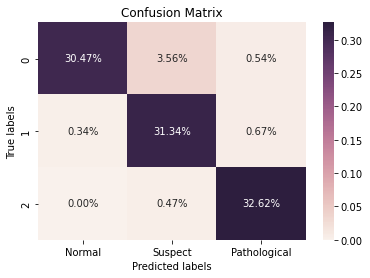

In [ ]:
ax = plt.subplot()
sns.heatmap(knn_cfmatrix/np.sum(knn_cfmatrix), fmt='.2%', annot=True, ax = ax, cmap = cmap);

# labels, title and ticks
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"])

plt.show()

In [ ]:
# to show the accuracy for no_neighbours from 1 until 8
no_neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))

In [ ]:
for i, k in enumerate(no_neighbors):
    # We instantiate the classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn.fit(x_train, y_train)

    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)

    # Compute accuracy on the testing set
    test_accuracy[i] = knn.score(x_test, y_test)

In [ ]:
train_accuracy

array([0.99971223, 0.99510791, 0.97928058, 0.98129496, 0.96978417,
       0.97151079, 0.96316547, 0.96      ])

In [ ]:
test_accuracy

array([0.97181208, 0.96577181, 0.95503356, 0.95637584, 0.9442953 ,
       0.93959732, 0.93557047, 0.93691275])

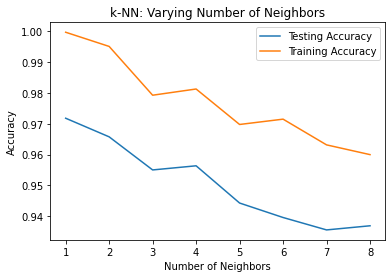

In [ ]:
# Visualization of k values vs accuracy
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(no_neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(no_neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#Grid Search KNN Parameters
knn_param = {
    "n_neighbors":[4, 6, 8, 10, 20],
    "weights":['uniform','distance'],
    "algorithm":['ball_tree', 'kd_tree', 'brute'],
    "p":[1,2]}

#Grid Search KNN
knn_grid = Searcher(KNeighborsClassifier(), knn_param, x_train, y_train, x_test, y_test,label='KNN Grid')

# knn_grid, knn_cfmatrix_grid= Searcher(KNeighborsClassifier(), knn_param, x_train, y_train, x_test, y_test,label='KNN Grid')

Start model fitting for KNN Grid
**Grid search results of KNN Grid **
The best parameters are: {'algorithm': 'ball_tree', 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
Best training accuracy:	 0.9697861803968333
Classification Report:
              precision    recall  f1-score   support

         1.0       0.99      0.92      0.95       515
         2.0       0.92      0.98      0.95       482
         3.0       0.98      0.99      0.98       493

    accuracy                           0.96      1490
   macro avg       0.96      0.96      0.96      1490
weighted avg       0.96      0.96      0.96      1490



Start model fitting for KNN Grid

**Grid search results of KNN Grid **

The best parameters are: {'algorithm': 'ball_tree', 'n_neighbors': 4, 'p': 1, 'weights': 'distance'}

Best training accuracy:	 0.9697861803968333

Classification Report:

```
              precision    recall  f1-score   support

         1.0       0.99      0.92      0.95       515
         2.0       0.92      0.98      0.95       482
         3.0       0.98      0.99      0.98       493

    accuracy                           0.96      1490
   macro avg       0.96      0.96      0.96      1490
weighted avg       0.96      0.96      0.96      1490

```
________________________________________________________________________________
Start model fitting for KNN Random

**Random search results of KNN Random **

The best parameters are: {'weights': 'uniform', 'p': 2, 'n_neighbors': 6, 'algorithm': 'brute'}

Best training accuracy:	 0.9418662426711716

Classification Report:

```
              precision    recall  f1-score   support

         1.0       0.97      0.89      0.93       515
         2.0       0.88      0.96      0.92       482
         3.0       0.98      0.96      0.97       493

    accuracy                           0.94      1490
   macro avg       0.94      0.94      0.94      1490
weighted avg       0.94      0.94      0.94      1490


```


Based on the results we get, knn with parameters {'algorithm': 'ball_tree', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'} will give the best accuracy. Hence, we can test with the best paramters now.

In [ ]:
knn_best = KNeighborsClassifier(algorithm = 'ball_tree', n_neighbors = 4, p = 1, weights = 'distance')
knn_best.fit(x_train, y_train)

print(knn_best.score(x_test, y_test))

0.961744966442953


In [ ]:
knn_best_pred = knn_best.predict(x_test)

print("Accuracy Score with Best Parameters: %f"%(accuracy_score(y_test, knn_best_pred)*100))

Accuracy Score with Best Parameters: 96.174497


In [ ]:
print("Confusion Matrix:")
knn_best_cfmatrix = confusion_matrix(y_test, knn_best_pred)
print(knn_best_cfmatrix)

Confusion Matrix:
[[472  38   5]
 [  4 474   4]
 [  0   6 487]]


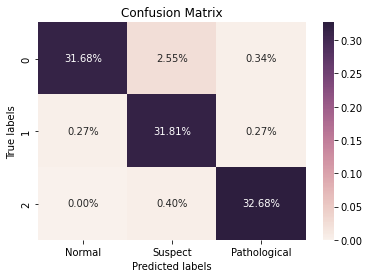

In [ ]:
ax = plt.subplot()
sns.heatmap(knn_best_cfmatrix/np.sum(knn_best_cfmatrix), fmt='.2%', annot=True, ax = ax, cmap = cmap);

# labels, title and ticks
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"])

plt.show()

In [ ]:
# Evaluation of KNN model
knn_eval = evaluate_model(knn_best, x_test, y_test)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 0.961744966442953
Precision: 0.9628364641410182
Recall: 0.9625789861999835
F1 Score: 0.9618021077462583
Cohens Kappa Score: 0.942644162846546
Confusion Matrix:
 [[472  38   5]
 [  4 474   4]
 [  0   6 487]]


### Decision Tree

In [ ]:
dtc = DecisionTreeClassifier(random_state = 42)
dtc.fit(x_train,y_train)
print('Baseline Decision Tres: ', dtc.score(x_test, y_test))

Baseline Decision Tres:  0.9322147651006711


In [ ]:
dtc_pred = dtc.predict(x_test)
print("Baseline accuracy score:%f"%(accuracy_score(y_test, dtc_pred)*100))

Baseline accuracy score:93.221477


In [ ]:
print("Classification Report")
print(classification_report(y_test, dtc_pred))

Classification Report
              precision    recall  f1-score   support

         1.0       0.91      0.93      0.92       515
         2.0       0.92      0.92      0.92       482
         3.0       0.97      0.95      0.96       493

    accuracy                           0.93      1490
   macro avg       0.93      0.93      0.93      1490
weighted avg       0.93      0.93      0.93      1490



In [ ]:
print("Confusion Matrix:")
dtc_cfmatrix = confusion_matrix(y_test, dtc_pred)
print(dtc_cfmatrix)

Confusion Matrix:
[[477  29   9]
 [ 33 443   6]
 [ 12  12 469]]


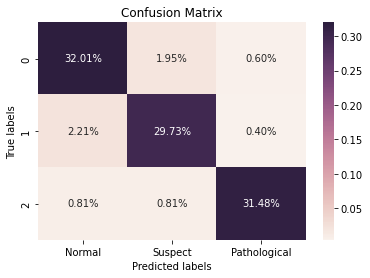

In [ ]:
ax = plt.subplot()
sns.heatmap(dtc_cfmatrix/np.sum(dtc_cfmatrix), fmt='.2%', annot=True, ax = ax, cmap = cmap);

# labels, title and ticks
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"])

plt.show()

In [ ]:
#Grid Search DTC Parameters
dtc_param = {
    'criterion': ['gini','entropy'],
    'max_depth' : [5, 10, 20],
    'min_samples_leaf': [1,2,5,10,13,15]}

#Grid Search DTC
dtc_grid  = Searcher(DecisionTreeClassifier(), dtc_param, x_train, y_train, x_test, y_test, label='DTC Grid')

# dtc_grid, dtc_cfmatrix_grid = Searcher(DecisionTreeClassifier(), dtc_param, x_train, y_train, x_test, y_test, label='DTC Grid')

Start model fitting for DTC Grid
**Grid search results of DTC Grid **
The best parameters are: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1}
Best training accuracy:	 0.9542391268342774


Start model fitting for DTC Grid

**Grid search results of DTC Grid **

The best parameters are: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1}

Best training accuracy:	 0.9542391268342774

In [ ]:
# print("Confusion Matrix for DTC Grid Search:")
# print(dtc_cfmatrix_grid)

In [ ]:
# ax1 = plt_subplot()
# sns.heatmap(dtc_cfmatrix_grid/np.sum(dtc_cfmatrix_grid), fmt='.2%', annot=True, ax=ax1, cmap = cmap);

# # labels, title and ticks
# ax1.set_xlabel("Predicted labels")
# ax1.set_ylabel("True labels")
# ax1.set_title("Confusion Matrix for DTC Grid Search")
# ax1.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"])

# plt.show()

In [ ]:
dtc_best = DecisionTreeClassifier(max_depth = 20, min_samples_leaf = 1, criterion = 'gini', random_state=42)
dtc_best.fit(x_train, y_train)

print(dtc_best.score(x_test, y_test))

0.9395973154362416


In [ ]:
dtc_best_pred = dtc_best.predict(x_test)

print("Accuracy Score with Best Parameters: %f"%(accuracy_score(y_test, dtc_best_pred)*100))

Accuracy Score with Best Parameters: 93.959732


In [ ]:
print("Confusion Matrix:")
dtc_best_cfmatrix = confusion_matrix(y_test, dtc_best_pred)
print(dtc_best_cfmatrix)

Confusion Matrix:
[[476  30   9]
 [ 23 453   6]
 [ 12  10 471]]


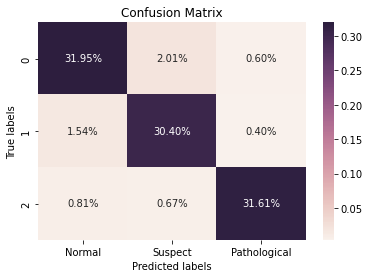

In [ ]:
ax = plt.subplot()
sns.heatmap(dtc_best_cfmatrix/np.sum(dtc_best_cfmatrix), fmt='.2%', annot=True, ax = ax, cmap = cmap);

# labels, title and ticks
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"])

plt.show()

In [ ]:
# Evalutaion of Decision Tree model
dtc_eval = evaluate_model(dtc_best, x_test, y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Confusion Matrix:\n', dtc_eval['cm'])

Accuracy: 0.9395973154362416
Precision: 0.9398355830490958
Recall: 0.9398270410353851
F1 Score: 0.9397707819627787
Cohens Kappa Score: 0.9093741953665276
Confusion Matrix:
 [[476  30   9]
 [ 23 453   6]
 [ 12  10 471]]


### Gradient Boost

Baseline accuracy score (with default parameters)

In [ ]:
# Classifier Algorithm 3: Gradient Boost
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)

gbc.score(x_test, y_test)

0.9543624161073826

In [ ]:
gbc_pred = gbc.predict(x_test)
print(gbc_pred)

print("\nBaseline Accuracy Score: %f"%(accuracy_score(y_test, gbc_pred)*100))


[3. 2. 3. ... 3. 2. 1.]

Baseline Accuracy Score: 95.436242


In [ ]:
print("Classification Report")
print(classification_report(y_test, gbc_pred))

Classification Report
              precision    recall  f1-score   support

         1.0       0.99      0.90      0.94       515
         2.0       0.90      0.98      0.94       482
         3.0       0.98      0.99      0.98       493

    accuracy                           0.95      1490
   macro avg       0.96      0.96      0.95      1490
weighted avg       0.96      0.95      0.95      1490



In [ ]:
print("Confusion Matrix:")
gbc_cfmatrix = confusion_matrix(y_test, gbc_pred)
print(gbc_cfmatrix)

Confusion Matrix:
[[463  46   6]
 [  4 473   5]
 [  2   5 486]]


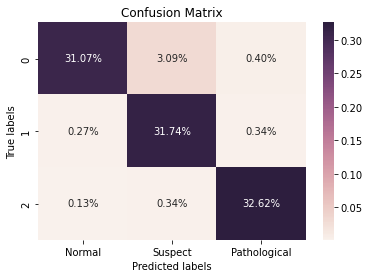

In [ ]:
ax = plt.subplot()
sns.heatmap(gbc_cfmatrix/np.sum(gbc_cfmatrix), fmt='.2%', annot=True, ax = ax, cmap = cmap);

# labels, title and ticks
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"])

plt.show()

link to find GBC parameters : https://www.projectpro.io/recipes/find-optimal-parameters-using-gridsearchcv-for-regression

**Grid search** and random search to find the best parameters (but random search is commented since we are not using it in our project and also I haven't run the code for random search) 


In [ ]:
#Grid Search GBC Parameters
gbc_param = {"loss": ["deviance"],
              "learning_rate": [0.05, 0.1], 
              "max_depth": [3, 5, 8]
            }

#Grid Search GBC
gbc_grid = Searcher(GradientBoostingClassifier(), gbc_param, x_train, y_train, x_test, y_test, label='GBC Grid')

# gbc_grid, gbc_cfmatrix_grid = Searcher(GradientBoostingClassifier(), gbc_param, x_train, y_train, x_test, y_test, label='GBC Grid')

The following is the result of grid search for GBC

Start model fitting for GBC Grid

**Grid search results of GBC Grid **

The best parameters are: {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 8}

Best training accuracy:	 0.9818717082380999

Classification Report:


```
              precision    recall  f1-score   support

         1.0       1.00      0.94      0.97       515
         2.0       0.94      0.99      0.96       482
         3.0       0.98      0.99      0.99       493

    accuracy                           0.97      1490
   macro avg       0.97      0.97      0.97      1490
weighted avg       0.97      0.97      0.97      1490
```



In [ ]:
# print("Confusion Matrix for RFC Grid Search:")
# print(gbc_cfmatrix_grid)

In [ ]:
# ax1 = fig.add_subplot()
# sns.heatmap(gbc_cfmatrix_grid/np.sum(gbc_cfmatrix_grid), fmt='.2%', annot=True, ax=ax1, cmap = cmap);

# # labels, title and ticks
# ax1.set_xlabel("Predicted labels")
# ax1.set_ylabel("True labels")
# ax1.set_title("Confusion Matrix for GBC Grid Search")
# ax1.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"])

# plt.show()


Here is to test the data with GBC which has the best parameter

In [ ]:
gbc_best = GradientBoostingClassifier(learning_rate = 0.1, loss = "deviance", max_depth = 8)
gbc_best.fit(x_train, y_train)

print(gbc_best.score(x_test, y_test))

0.9718120805369127


In [ ]:
gbc_best_pred = gbc_best.predict(x_test)

print("Accuracy Score with Best Parameters: %f"%(accuracy_score(y_test, gbc_best_pred)*100))

Accuracy Score with Best Parameters: 97.181208


In [ ]:
print("Confusion Matrix:")
gbc_best_cfmatrix = confusion_matrix(y_test, gbc_best_pred)
print(gbc_best_cfmatrix)

Confusion Matrix:
[[484  26   5]
 [  0 478   4]
 [  0   4 489]]


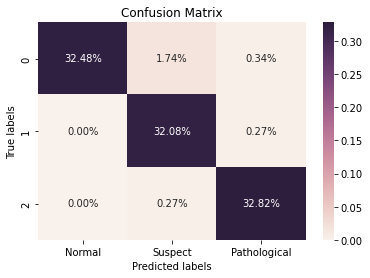

In [ ]:
ax = plt.subplot()
sns.heatmap(gbc_best_cfmatrix/np.sum(gbc_best_cfmatrix), fmt='.2%', annot=True, ax = ax, cmap = cmap);

# labels, title and ticks
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"])

plt.show()

link : https://www.datasciencelearner.com/gradient-boosting-hyperparameters-tuning/

In [ ]:
# Evalutaion of Gradient Boost model
gbc_eval = evaluate_model(gbc_best, x_test, y_test)

# Print result
print('Accuracy:', gbc_eval['acc'])
print('Precision:', gbc_eval['prec'])
print('Recall:', gbc_eval['rec'])
print('F1 Score:', gbc_eval['f1'])
print('Cohens Kappa Score:', gbc_eval['kappa'])
print('Confusion Matrix:\n', gbc_eval['cm'])

Accuracy: 0.9718120805369127
Precision: 0.9723296493723209
Recall: 0.9724784319499977
F1 Score: 0.9718259256488085
Cohens Kappa Score: 0.9577305821062166
Confusion Matrix:
 [[482  28   5]
 [  1 477   4]
 [  0   4 489]]


### Random Forest

In [ ]:
# Classifier Algorithm 1: RFC
rfc = RandomForestClassifier(random_state = 42)
rfc.fit(x_train,y_train)

print('Baseline Random Forest: ',rfc.score(x_test, y_test))

Baseline Random Forest:  0.9697986577181208


In [ ]:
rfc_pred = rfc.predict(x_test)

print("Baseline Accuracy Score: %f"%(accuracy_score(y_test, rfc_pred)*100))


Baseline Accuracy Score: 96.979866


In [ ]:
print("Classification Report")
print(classification_report(y_test, rfc_pred))


Classification Report
              precision    recall  f1-score   support

         1.0       0.99      0.94      0.96       515
         2.0       0.94      0.98      0.96       482
         3.0       0.99      0.99      0.99       493

    accuracy                           0.97      1490
   macro avg       0.97      0.97      0.97      1490
weighted avg       0.97      0.97      0.97      1490

42


In [ ]:
print("Confusion Matrix:")
rfc_cfmatrix = confusion_matrix(y_test, rfc_pred)
print(rfc_cfmatrix)

Confusion Matrix:
[[484  27   4]
 [  6 473   3]
 [  0   5 488]]


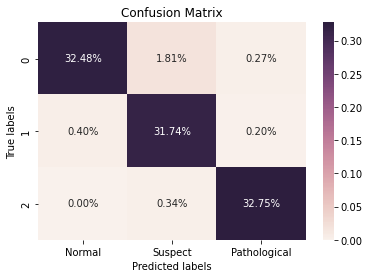

In [ ]:
ax = plt.subplot()
sns.heatmap(rfc_cfmatrix/np.sum(rfc_cfmatrix), fmt='.2%', annot=True, ax = ax, cmap = cmap);

# labels, title and ticks
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"])

plt.show()

In [ ]:
# to show the accuracy for no_neighbours from 1 until 8
no_trees = [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]
train_accuracy = np.empty(len(no_trees))
test_accuracy = np.empty(len(no_trees))

In [ ]:
for i, k in enumerate(no_trees):
    # We instantiate the classifier
    rfc = RandomForestClassifier(n_estimators=k)
    # Fit the classifier to the training data
    rfc.fit(x_train, y_train)

    # Compute accuracy on the training set
    train_accuracy[i] = rfc.score(x_train, y_train)

    # Compute accuracy on the testing set
    test_accuracy[i] = rfc.score(x_test, y_test)

In [ ]:
train_accuracy

In [ ]:
test_accuracy

In [ ]:
# Visualization of k values vs accuracy
plt.title('n_trees: Varying Number of Trees')
plt.plot(no_trees, test_accuracy, label='Testing Accuracy')
plt.plot(no_trees, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
#Grid Search RFC Parameters
rfc_param = {
    "n_estimators": [150, 200, 300, 400], #Specific parameters to be tested at all combinations
    "criterion": ['entropy'],
    "min_samples_leaf": [1, 4, 16],
    "min_samples_split": [2, 6, 20],
    "random_state": [42]
}

#Grid Search RFC
rfc_grid = Searcher(RandomForestClassifier(), rfc_param, x_train, y_train, x_test, y_test, label='RFC Grid')

# rfc_grid, rfc_cfmatrix_grid = Searcher(RandomForestClassifier(), rfc_param, x_train, y_train, x_test, y_test, label='RFC Grid')

Start model fitting for RFC Grid
**Grid search results of RFC Grid **
The best parameters are: {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150, 'random_state': 42}
Best training accuracy:	 0.9752517473251846
Classification Report:
              precision    recall  f1-score   support

         1.0       0.99      0.95      0.97       515
         2.0       0.94      0.99      0.97       482
         3.0       0.99      0.99      0.99       493

    accuracy                           0.98      1490
   macro avg       0.98      0.98      0.98      1490
weighted avg       0.98      0.98      0.98      1490



Start model fitting for RFC Grid

**Grid search results of RFC Grid **

The best parameters are: {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150, 'random_state': 42}

Best training accuracy:	 0.9752517473251846

Classification Report:


```
              precision    recall  f1-score   support

         1.0       0.99      0.95      0.97       515
         2.0       0.94      0.99      0.97       482
         3.0       0.99      0.99      0.99       493

    accuracy                           0.98      1490
   macro avg       0.98      0.98      0.98      1490
weighted avg       0.98      0.98      0.98      1490
```


            

____________________________________________________________________________________________________
Start model fitting for RFC Random

**Random search results of RFC Random **

The best parameters are: {'random_state': 42, 'n_jobs': -1, 'n_estimators': 180, 'min_samples_split': 6, 'min_samples_leaf': 1, 'criterion': 'entropy'}

Best training accuracy:	 0.9746737222167015

Classification Report:


```
              precision    recall  f1-score   support

         1.0       0.99      0.94      0.96       515
         2.0       0.93      0.99      0.96       482
         3.0       0.99      0.98      0.98       493

    accuracy                           0.97      1490
   macro avg       0.97      0.97      0.97      1490
weighted avg       0.97      0.97      0.97      1490
```




In [ ]:
# print("Confusion Matrix for RFC Grid Search:")
# print(rfc_cfmatrix_grid)


Confusion Matrix for RFC Grid Search:
[[487  25   3]
 [  4 476   2]
 [  0   3 490]]


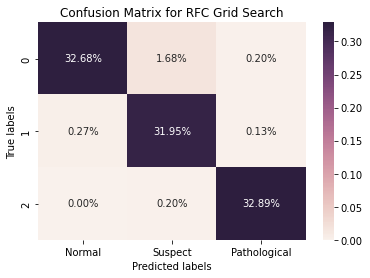

In [ ]:
# ax1 = plt.subplot()
# sns.heatmap(rfc_cfmatrix_grid/np.sum(rfc_cfmatrix_grid), fmt='.2%', annot=True, ax=ax1, cmap = cmap);

# # labels, title and ticks
# ax1.set_xlabel("Predicted labels")
# ax1.set_ylabel("True labels")
# ax1.set_title("Confusion Matrix for RFC Grid Search")
# ax1.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"])

# plt.show()


In [ ]:


ax2 = fig.add_subplot(1, 2, 2)
sns.heatmap(rfc_cfmatrix_rand/np.sum(rfc_cfmatrix_rand), fmt='.2%', annot=True, ax=ax2, cmap = cmap);

# labels, title and ticks
ax2.set_xlabel("Predicted labels")
ax2.set_ylabel("True labels")
ax2.set_title("Confusion Matrix for RFC Randomaized Search")
ax2.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"])

Based on the results we get, RFC with parameters {'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300, 'n_jobs': -1, 'random_state': 42} will give the best accuracy. Hence, we can test with the best paramters now.

In [ ]:
rfc_best = RandomForestClassifier(random_state = 42, n_estimators = 150, min_samples_split = 2, min_samples_leaf = 1, criterion = 'entropy')
rfc_best.fit(x_train, y_train)

print(rfc_best.score(x_test, y_test))

0.9751677852348993


In [ ]:
rfc_best_pred = rfc_best.predict(x_test)

print("Accuracy Score with Best Parameters: %f"%(accuracy_score(y_test, rfc_best_pred)*100))

Accuracy Score with Best Parameters: 97.516779


In [ ]:
print("Confusion Matrix:")
rfc_best_cfmatrix = confusion_matrix(y_test, rfc_best_pred)
print(rfc_best_cfmatrix)

Confusion Matrix:
[[487  25   3]
 [  4 476   2]
 [  0   3 490]]


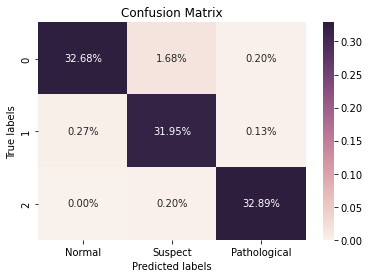

In [ ]:
ax = plt.subplot()
sns.heatmap(rfc_best_cfmatrix/np.sum(rfc_best_cfmatrix), fmt='.2%', annot=True, ax = ax, cmap = cmap);

# labels, title and ticks
ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["Normal", "Suspect", "Pathological"])

plt.show()

In [ ]:
# Evalutaion of Random Forest model
rfc_eval = evaluate_model(rfc_best, x_test, y_test)

# Print result
print('Accuracy:', rfc_eval['acc'])
print('Precision:', rfc_eval['prec'])
print('Recall:', rfc_eval['rec'])
print('F1 Score:', rfc_eval['f1'])
print('Cohens Kappa Score:', rfc_eval['kappa'])
print('Confusion Matrix:\n', rfc_eval['cm'])

Accuracy: 0.9751677852348993
Precision: 0.9753989316107443
Recall: 0.9756992474944378
F1 Score: 0.9752036434193943
Cohens Kappa Score: 0.9627568446880033
Confusion Matrix:
 [[487  25   3]
 [  4 476   2]
 [  0   3 490]]


## Comparison of Performance between Classification Algorithms

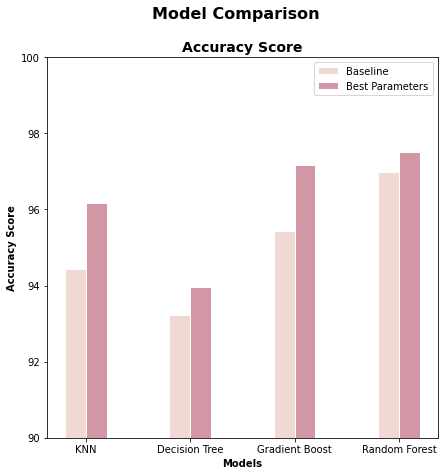

In [ ]:
# Intitialize figure with one plot
colorss = ["#f0d9d2", "#d396a5", "#ae6b91", "#2d1e3e"]

fig, (ax1) = plt.subplots(1)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(7)
fig.set_facecolor('white')

## set bar size
barWidth = 0.2
bas_score = [(accuracy_score(y_test, knn_pred)*100), (accuracy_score(y_test, dtc_pred)*100),
             (accuracy_score(y_test, gbc_pred)*100), (accuracy_score(y_test, rfc_pred)*100)]
best_score = [(accuracy_score(y_test, knn_best_pred)*100), (accuracy_score(y_test, dtc_best_pred)*100),
              (accuracy_score(y_test, gbc_best_pred)*100), (accuracy_score(y_test, rfc_best_pred)*100)]

## Set position of bar on X axis
r1 = np.arange(len(bas_score))pp
r1 = [x + barWidth for x in r1]
r2 = [x + barWidth for x in r1]

## Make the plot
ax1.bar(r1, bas_score, width=barWidth, edgecolor='white', label='Baseline', color=colorss[0])
ax1.bar(r2, best_score, width=barWidth, edgecolor='white', label='Best Parameters', color=colorss[1])

## Configure x and y axis
ax1.set_xlabel('Models', fontweight='bold')
labels = ['KNN', 'Decision Tree', 'Gradient Boost', 'Random Forest']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(bas_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Accuracy Score', fontweight='bold')
ax1.set_ylim(90, 100)

## Create legend & title
ax1.set_title('Accuracy Score', fontsize=14, fontweight='bold')
ax1.legend()

plt.show()